In [25]:
#see other examples here
#https://github.com/AustinLBuchanan/Combinatorial-Optimization-in-Gurobi

import networkx as nx

import random
random.seed(246)        # or any integer
import numpy
numpy.random.seed(4812)


In [32]:
# Create a graph
#https://networkx.org/documentation/stable/reference/generators.html

#G=nx.florentine_families_graph()#
#G = nx.les_miserables_graph()
#G = nx.karate_club_graph()

n=150
p=0.5

G=nx.fast_gnp_random_graph(n, p, seed=None, directed=False)



print("Number of vertices:",G.number_of_nodes())
print("Number of edges:",G.number_of_edges())
print("Vertices:",G.nodes)

Number of vertices: 150
Number of edges: 5615
Vertices: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149]


In [33]:
# Visualize the graph, for fun
import matplotlib.pyplot as plt
node_colors = ["grey" for i in G.nodes]

#nx.draw(G,with_labels=True, node_color=node_colors )

In [34]:
import gurobipy as gp
from gurobipy import GRB

In [39]:
# Create model object
m = gp.Model()

# Create variable for each node
x = m.addVars( G.nodes, vtype=GRB.BINARY )

# Objective function: maximize number of nodes
m.setObjective( gp.quicksum( x[i] for i in G.nodes ), GRB.MAXIMIZE )

# Add constraint for each missing edge (i.e., edge of the complement graph)
CG = nx.complement(G)
m.addConstrs( x[i] + x[j] <= 1 for i,j in CG.edges )

#mip logging
#https://www.gurobi.com/documentation/10.0/refman/mip_logging.html
# Solve

#m.setParam("Presolve",0)

#default is 0.05
#m.setParam("Heuristics",0)
#m.setParam("Cuts",1)

#https://www.gurobi.com/documentation/10.0/refman/mipgap2.html#parameter:MIPGap
m.setParam("MIPGap",1.1)

m.optimize()

Set parameter MIPGap to value 1.1
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: 12th Gen Intel(R) Core(TM) i9-12900K, instruction set [SSE2|AVX|AVX2]
Thread count: 16 physical cores, 24 logical processors, using up to 24 threads

Optimize a model with 5560 rows, 150 columns and 11120 nonzeros
Model fingerprint: 0x433f4fa8
Variable types: 0 continuous, 150 integer (150 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 7.0000000
Presolve removed 4737 rows and 0 columns
Presolve time: 0.02s
Presolved: 823 rows, 150 columns, 5544 nonzeros
Variable types: 0 continuous, 150 integer (150 binary)

Root relaxation: objective 2.021053e+01, 707 iterations, 0.03 seconds (0.06 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | 

In [16]:
print("Objective:",m.objVal)

selected_nodes = [ i for i in G.nodes if x[i].x > 0.5 ]

print("Selected nodes:", selected_nodes)

Objective: 10.0
Selected nodes: [2, 40, 48, 98, 125, 149, 152, 167, 179, 186]


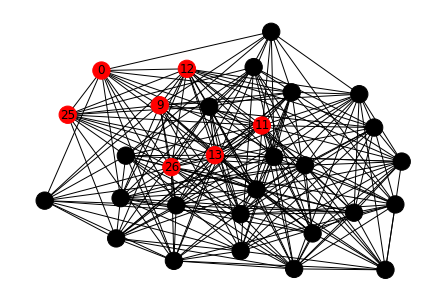

In [67]:
# Visualize the solution
node_colors = ["red" if i in selected_nodes else "black" for i in G.nodes]

nx.draw(G, with_labels=True, node_color=node_colors )